## Churn Explority Data Analysis

This project is part of the Codecademy Data Analytics with AI Bootcamp Contest #1. The goal is to perform an Exploratory Data Analysis (EDA) on a churn dataset to uncover insights about customer behavior and the factors driving churn.

Project Objectives

Clean & prepare the raw dataset for analysis.

Explore categorical variables (e.g., Gender, Geography, IsActiveMember).

Analyze numerical features (e.g., Age, CreditScore, Balance).

Visualize churn patterns and highlight key insights.

The target variable is Exited:

1 → Customer churned

0 → Customer retained

This notebook begins with data cleaning:

Removing unnecessary identifiers (RowNumber, CustomerId, Surname).

Checking data types and null values.

Preparing the dataset for categorical and numerical analysis.

### Import libraies

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objects as go   
import plotly.io as pio

### Set some options

In [33]:
pd.set_option('display.max_columns', None)


### Read the churn_modelling data

Reviewing the data via
churn_df.head():  
    We can quickly identify some columns that can be dropped like RowNumber, CustomerId, surnmae for example. 
churn_df.info(): 
    Identified that there are  10,000 rows
    Column data types (int64, float64, object)
    Missing Values = none
churn_df.describe()
    Identified the Mean, std, min, max, qquartiles for numeric columns.
    Helps to spot outliers (for example, Age max might look )
    Compare distri

In [34]:
churn_df = pd.read_csv(r"c:\Scripts\Python\churn_modelling.csv")
display(churn_df.head())
display(churn_df.info())
display(churn_df.describe())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### First pass Cleanup

We've identified some columns that are not needed for our analysis as follows:

RowNumber
CustomerID
Surname

In [35]:
# Drop identifier columns that don't add predictive value
churn_clean = churn_df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Confirm the new shape
print("Original shape:", churn_df.shape)
print("Cleaned shape:", churn_clean.shape)

# Quick check for missing values
print("\nMissing values per column:")
print(churn_clean.isnull().sum())

# Preview cleaned dataset
churn_clean.head()


Original shape: (10000, 14)
Cleaned shape: (10000, 11)

Missing values per column:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Let's review and see what is unique.  We are just poking around to be sure that we understand the unique values and that it makes sense. 

In [36]:
# Summarize numeric features
churn_df.describe()

# Check unique values for categorical features
print("\nGeography:", churn_df["Geography"].unique())
print("Gender:", churn_df["Gender"].unique())
print("HasCrCard:", churn_df["HasCrCard"].unique())
print("IsActiveMember:", churn_df["IsActiveMember"].unique())
print("NumOfProducts:", churn_df["NumOfProducts"].unique()) # if you want this sorted use: print(sorted(churn_df["NumOfProducts"].unique()))




Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
HasCrCard: [1 0]
IsActiveMember: [1 0]
NumOfProducts: [1 3 2 4]


### Exploritory Data Analysis

Now the moment we have been aming for.  Data has been reviewed and cleaned.  It is in a perfect state to begin our EDA.

We've imported the necessary libraries earlier in the notebook, so no need to do this again unless we require new libraries. 

Let's first conduct a Categorical Analysis.

The Categroical Analysis was so worth it.   We start by inpecting features one by one; data looks normal initially, but then we start to see imporatnt features.  

Overall Churn Distribution

About 20% churned (Exited=1), while 80% stayed.

    This imbalance is common in churn datasets, and important later (e.g., for modeling, you might need balancing techniques).

Churn by Gender

    Males and females show similar churn rates.

    Gender does not seem like a strong predictor of churn.

Churn by Geography

    Germany has a noticeably higher churn rate.

    France has lower churn, Spain is in between.

    Geography appears to be an important feature.

Churn by Active Membership

    Inactive members (0) churn at a much higher rate.

    Being an active member strongly reduces churn risk.

    This is one of the clearest drivers we’ve seen so far.

Churn by Number of Products

    Customers with 1 product churn more.

    Customers with 2 products churn far less.

    Interestingly, those with 3 or 4 products churn a lot more again — this might be because they’re riskier or have complex accounts.

    Suggests a non-linear relationship.

Churn by Credit Card Ownership

    Having a credit card doesn’t strongly influence churn.

    Both groups (HasCrCard = 0 or 1) have similar churn distribution.

    Likely a weak feature.

Insights from Categorical Analysis

    Top churn indicators so far:

    Geography (Germany vs France).

    Active membership (inactive → higher churn).

    Number of products (1 or 3–4 → higher churn, 2 → lower churn).

Weaker indicators:

    Gender.

    Credit card ownership.

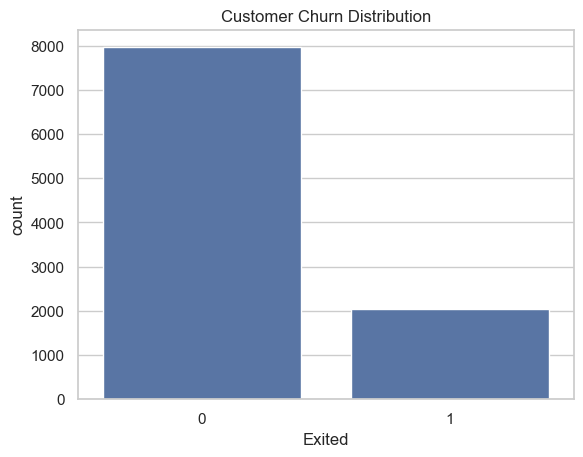

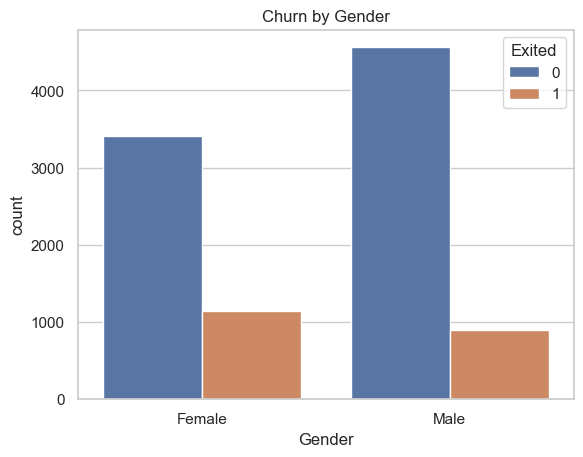

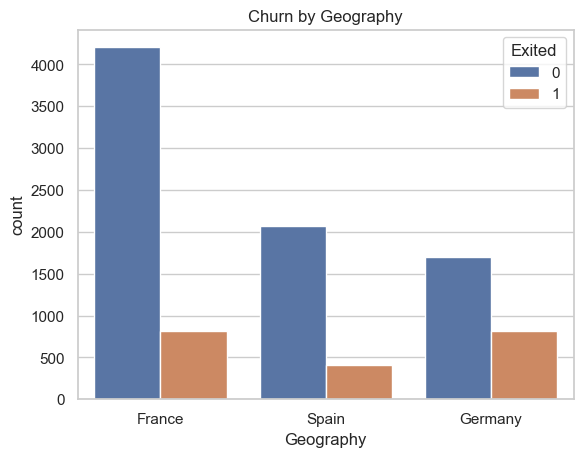

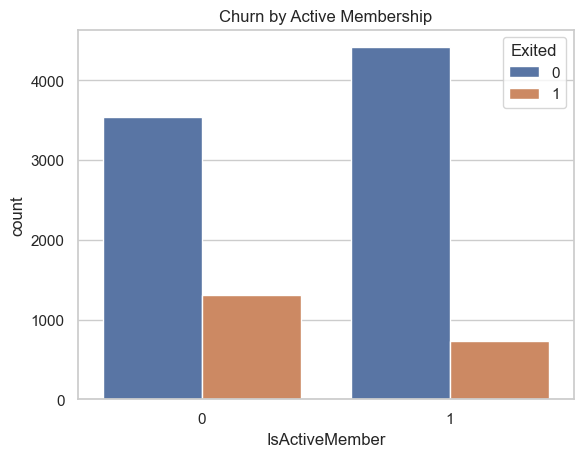

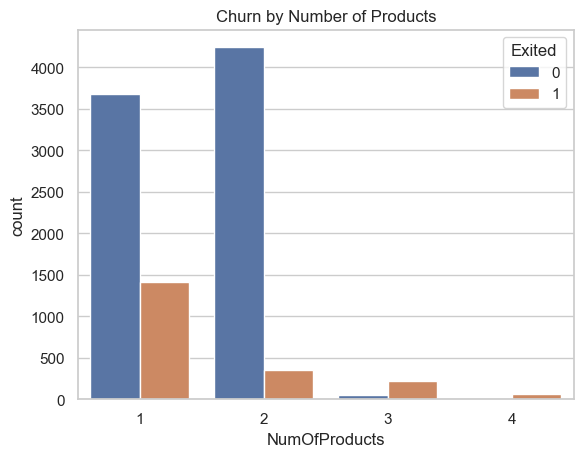

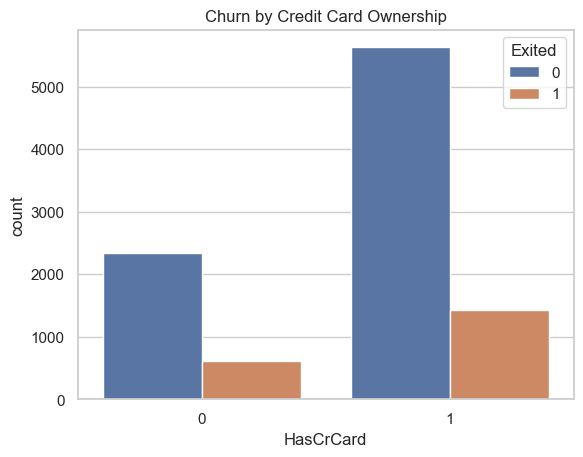

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot churn distribution
sns.countplot(x="Exited", data=churn_clean)
plt.title("Customer Churn Distribution")
plt.show()

# Churn by Gender
sns.countplot(x="Gender", hue="Exited", data=churn_clean)
plt.title("Churn by Gender")
plt.show()

# Churn by Geography
sns.countplot(x="Geography", hue="Exited", data=churn_clean)
plt.title("Churn by Geography")
plt.show()

# Churn by Active Membership
sns.countplot(x="IsActiveMember", hue="Exited", data=churn_clean)
plt.title("Churn by Active Membership")
plt.show()

# Churn by Number of Products
sns.countplot(x="NumOfProducts", hue="Exited", data=churn_clean)
plt.title("Churn by Number of Products")
plt.show()

# Churn by Credit Card Ownership
sns.countplot(x="HasCrCard", hue="Exited", data=churn_clean)
plt.title("Churn by Credit Card Ownership")
plt.show()

### Next let's conduct a numerical Analysis

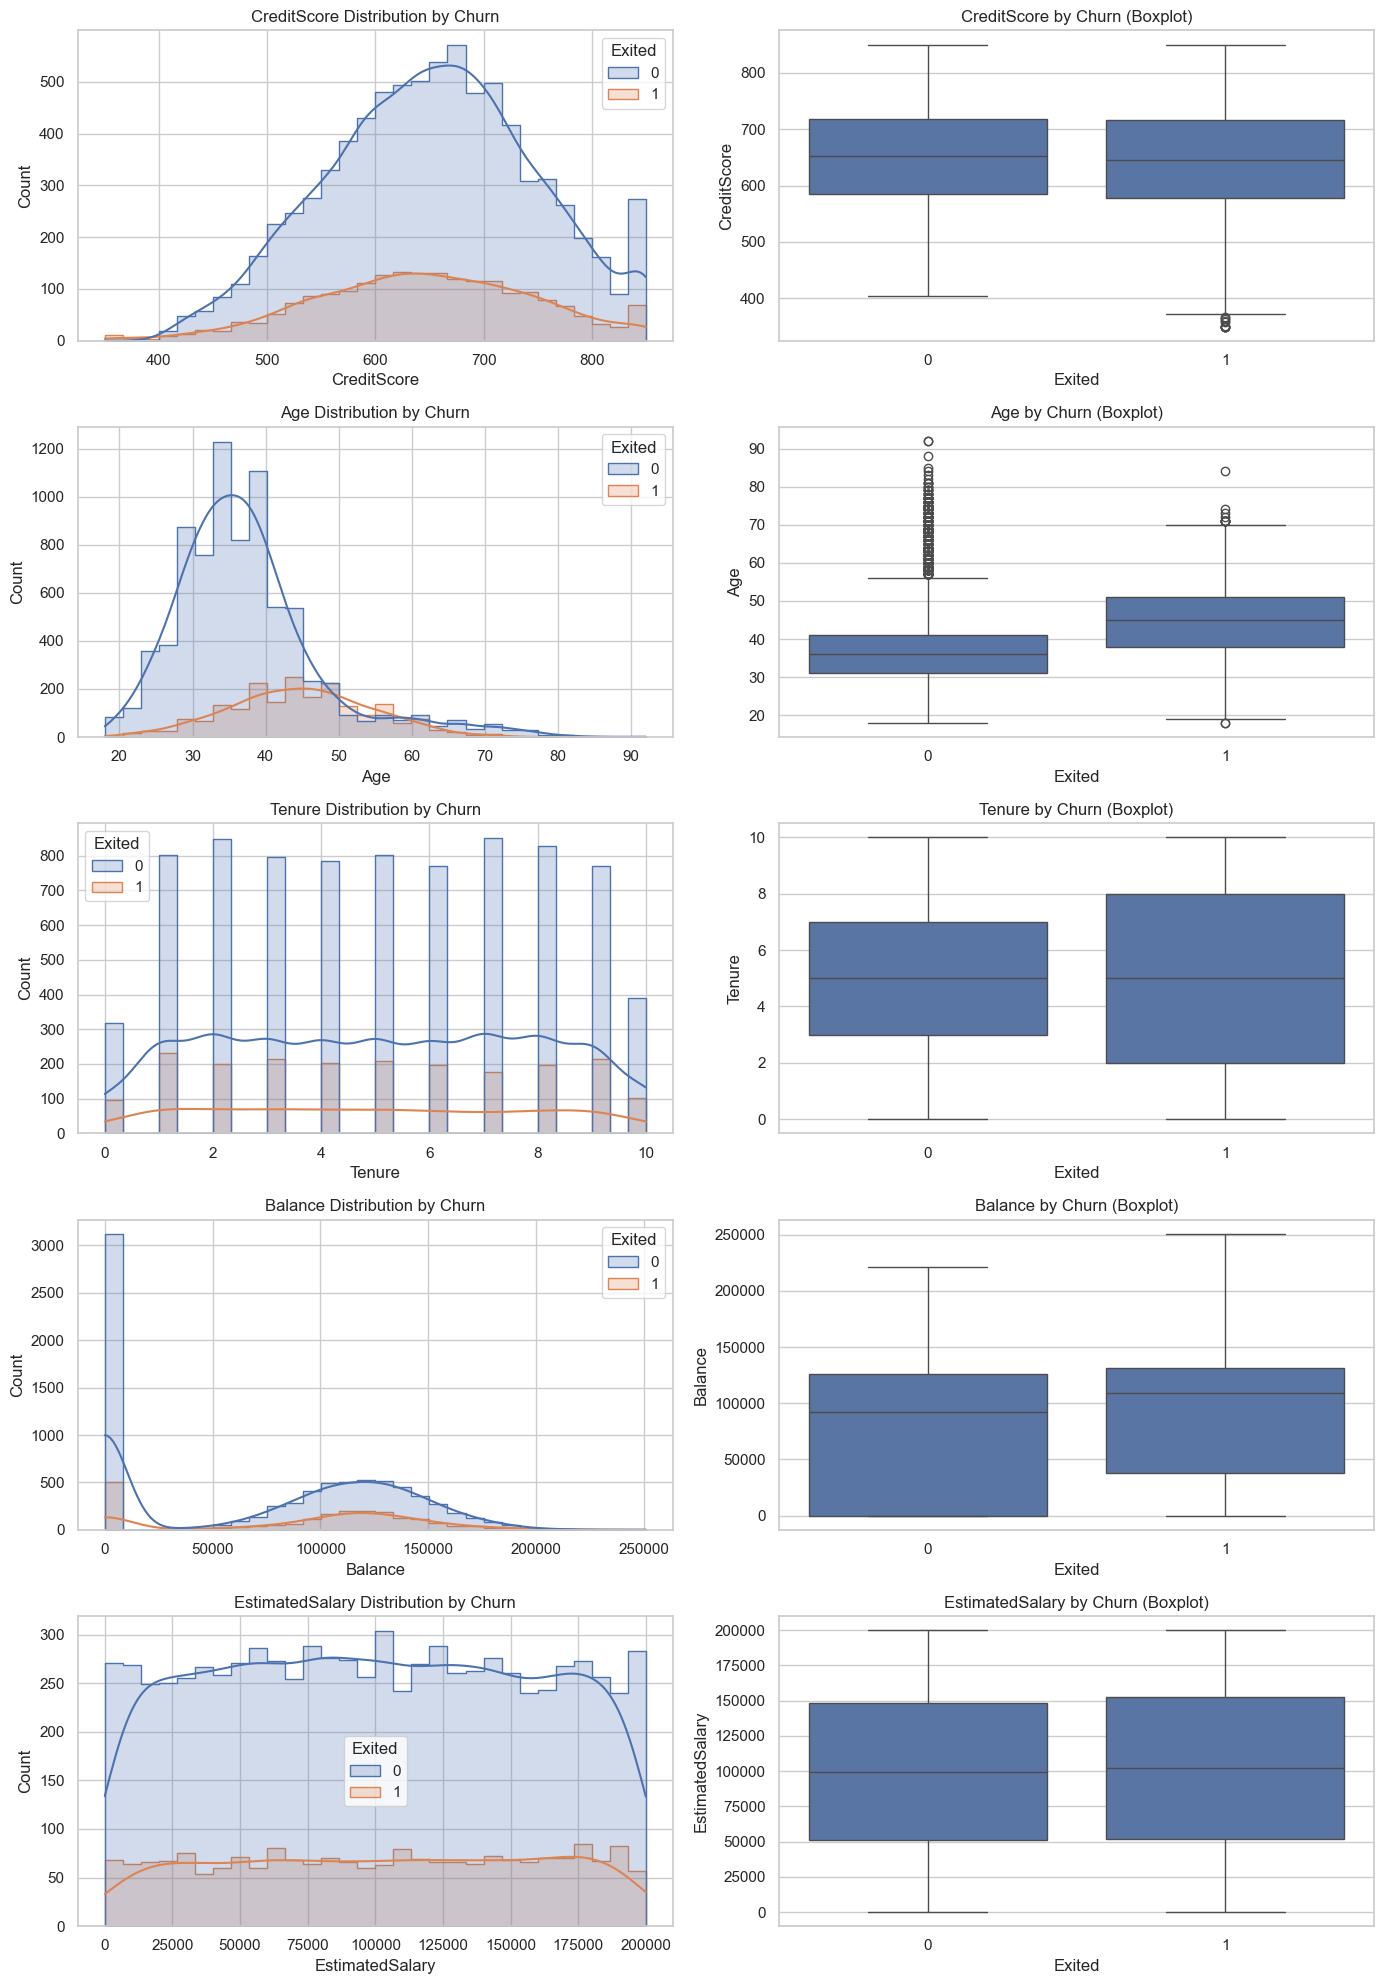

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features to analyze
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

# Setup subplots
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(14, 20))
sns.set(style="whitegrid")

for i, feature in enumerate(numerical_features):
    # Histogram distribution split by churn
    sns.histplot(
        ax=axes[i,0],
        data=churn_clean,
        x=feature,
        hue="Exited",
        kde=True,
        bins=30,
        element="step"
    )
    axes[i,0].set_title(f"{feature} Distribution by Churn")

    # Boxplot for churn comparison
    sns.boxplot(
        ax=axes[i,1],
        data=churn_clean,
        x="Exited",
        y=feature
    )
    axes[i,1].set_title(f"{feature} by Churn (Boxplot)")

plt.tight_layout()
plt.show()


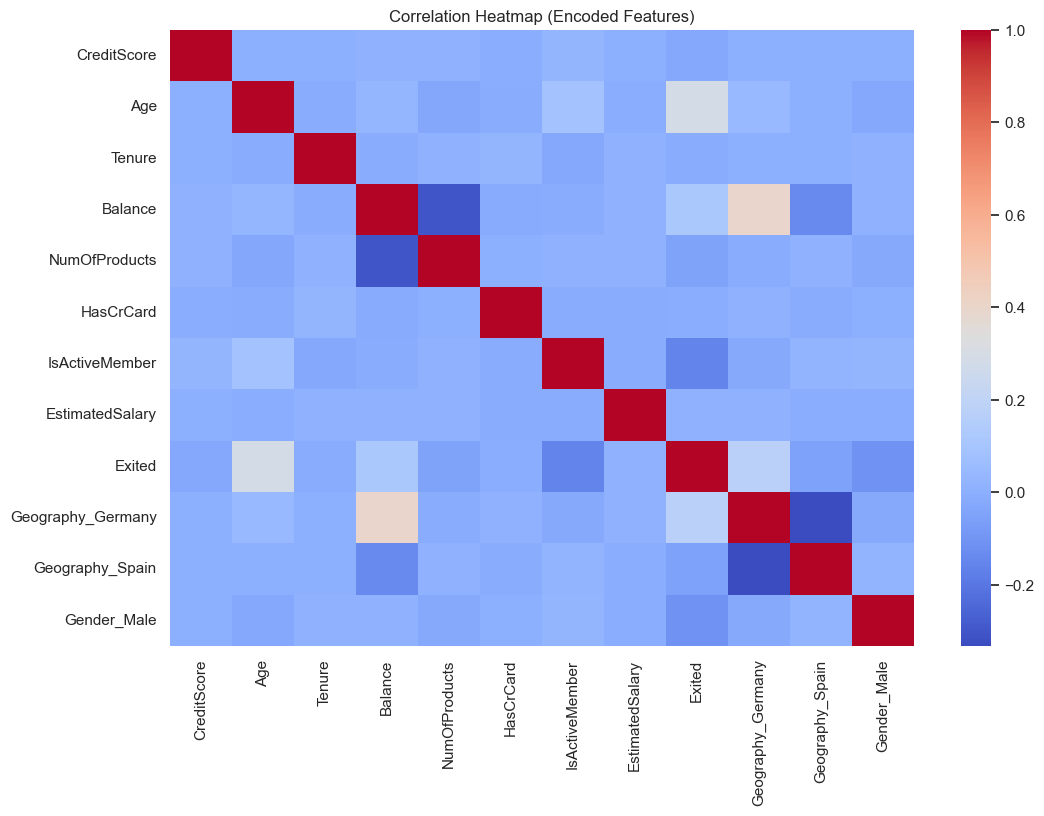

In [40]:
df_enc = pd.get_dummies(churn_clean, drop_first=True)

plt.figure(figsize=(12,8))
sns.heatmap(df_enc.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Encoded Features)")
plt.show()

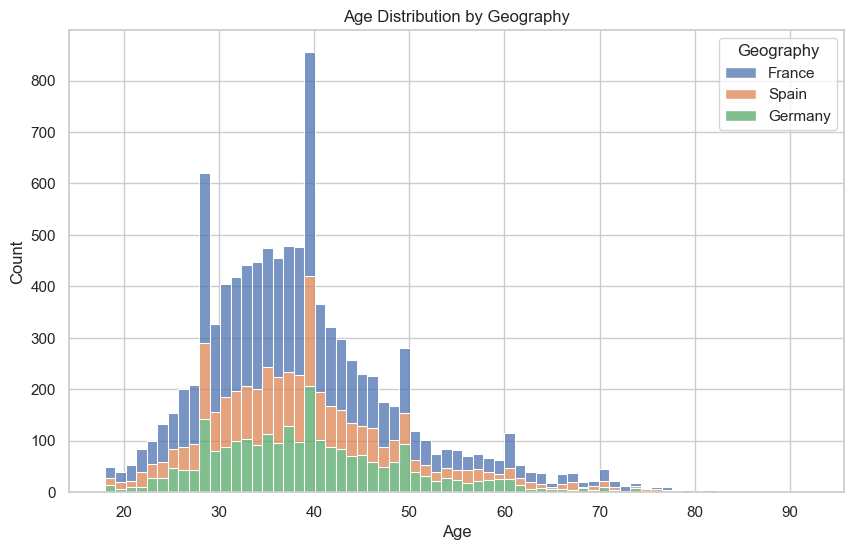

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(data=churn_clean, x="Age", hue="Geography", multiple="stack")
plt.title("Age Distribution by Geography")
plt.show()


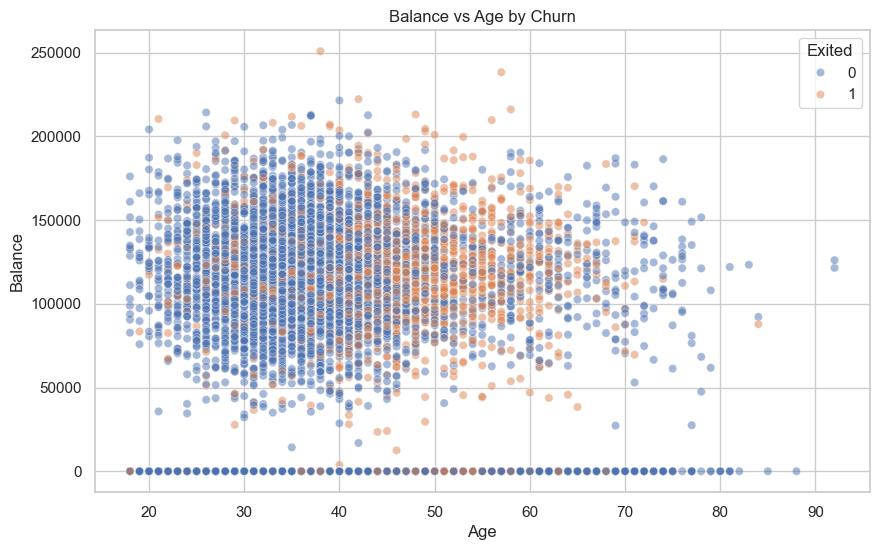

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=churn_clean, x="Age", y="Balance", hue="Exited", alpha=0.5)
plt.title("Balance vs Age by Churn")
plt.show()


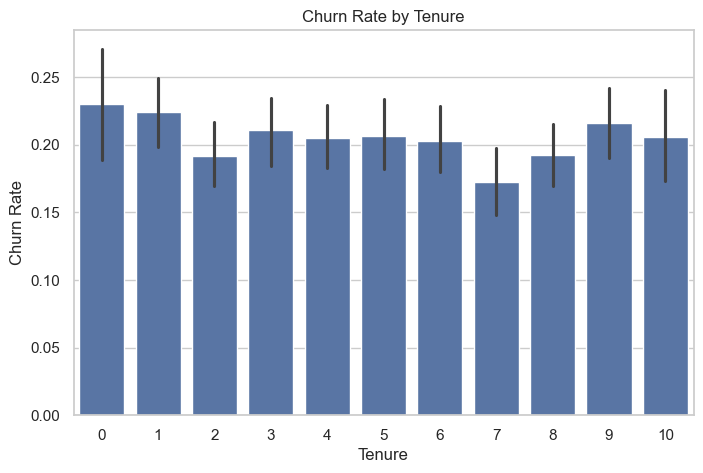

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x="Tenure", y="Exited", data=churn_clean, estimator=lambda x: sum(x)/len(x))
plt.title("Churn Rate by Tenure")
plt.ylabel("Churn Rate")
plt.show()


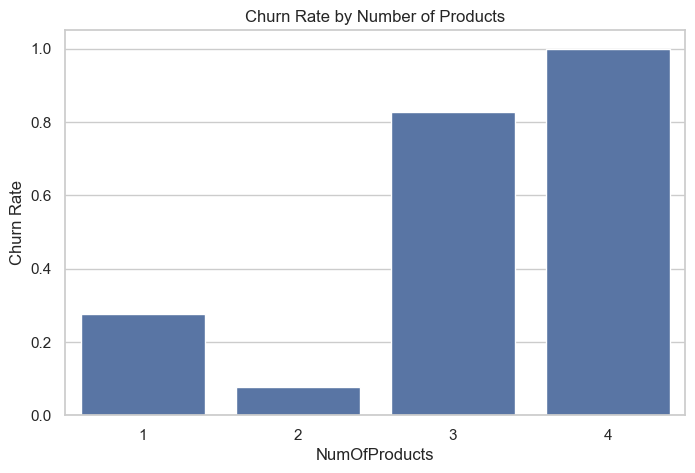

In [44]:
prod_churn = churn_clean.groupby("NumOfProducts")["Exited"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x="NumOfProducts", y="Exited", data=prod_churn)
plt.title("Churn Rate by Number of Products")
plt.ylabel("Churn Rate")
plt.show()
